# one-way MANOVA

In statistics, multivariate analysis of variance (MANOVA) is a procedure for comparing multivariate sample means (<a>"https://en.wikipedia.org/wiki/Multivariate_analysis_of_variance"</a>). As a multivariate procedure, it is used when there are two or more dependent variables, and is often followed by significance tests involving individual dependent variables separately. MANOVA is a generalized form of univariate analysis of variance (ANOVA), although, unlike univariate ANOVA, it uses the covariance between outcome variables in testing the statistical significance of the mean differences.

<img src="miscellanea/6_ManovaAssumptionNull.jpg" width="400">

Load dataset: A set of three species with attributes like height and canopy volume

In [1]:
library(tidyverse)
df=read_csv("manova_data.csv")
head(df)

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.0      v purrr   1.0.0 
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.2.1      v stringr 1.5.0 
v readr   2.1.3      v forcats 0.5.2 
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Rows: 40 Columns: 3
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (1): plant_var
dbl (2): height, canopy_vol

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


plant_var,height,canopy_vol
<chr>,<dbl>,<dbl>
A,20,0.70
A,22,0.80
A,24,0.95
A,18,0.60
A,20,0.74
A,20,0.76


Summary statistics and visualization of datasetPermalink
Get summary statistics based on each dependent variable,

- The "df" dataframe is passed as input to the pipe operator "%>%".

- The "group_by" function groups the data by the "plant_var" column.

- The "summarise" function calculates the number of observations "n", mean "mean", and standard deviation "sd" of the "height" column for each group defined by "plant_var".

The pipe operator "%>%" takes the output of the expression on its left-hand side and passes it as the first argument to the function on its right-hand side. 

In [2]:
# summary statistics for dependent variable height 
df %>% group_by(plant_var) %>%  summarise(n = n(), mean = mean(height), sd = sd(height))
# output
 

# summary statistics for dependent variable canopy_vol 
df %>% group_by(plant_var) %>%  summarise(n = n(), mean = mean(canopy_vol), sd = sd(canopy_vol))
# output
 

plant_var,n,mean,sd
<chr>,<int>,<dbl>,<dbl>
A,10,18.90,2.923088
B,10,16.54,1.920185
C,10,3.05,1.039498
D,10,9.35,2.106735


plant_var,n,mean,sd
<chr>,<int>,<dbl>,<dbl>
A,10,0.784,0.12130769
B,10,0.608,0.09681598
C,10,0.272,0.14327906
D,10,0.474,0.09453982


Visualize dataset:the code creates a ggplot2 plot in R using the following steps:

- The ggplot function creates a new plot object and specifies the data to use (df) and the mapping of variables to aesthetics (x = plant_var, y = height, and fill = plant_var).
- the argument fill = plant_var in the aes function specifies the variable to use for the fill color of the plot elements.
- The + operator adds layers to the plot, starting with a boxplot layer created with the geom_boxplot function. The outlier.shape argument is set to NA to remove outliers from the plot.
- The next layer is a jittered scatterplot created with the geom_jitter function, with the width argument set to 0.2. This spreads the points horizontally to reduce overplotting.
- The final step is to modify the appearance of the plot with the theme function, where the legend.position argument is set to "top" to move the legend to the top of the plot.


Caricamento pacchetto: 'gridExtra'


Il seguente oggetto è mascherato da 'package:dplyr':

    combine




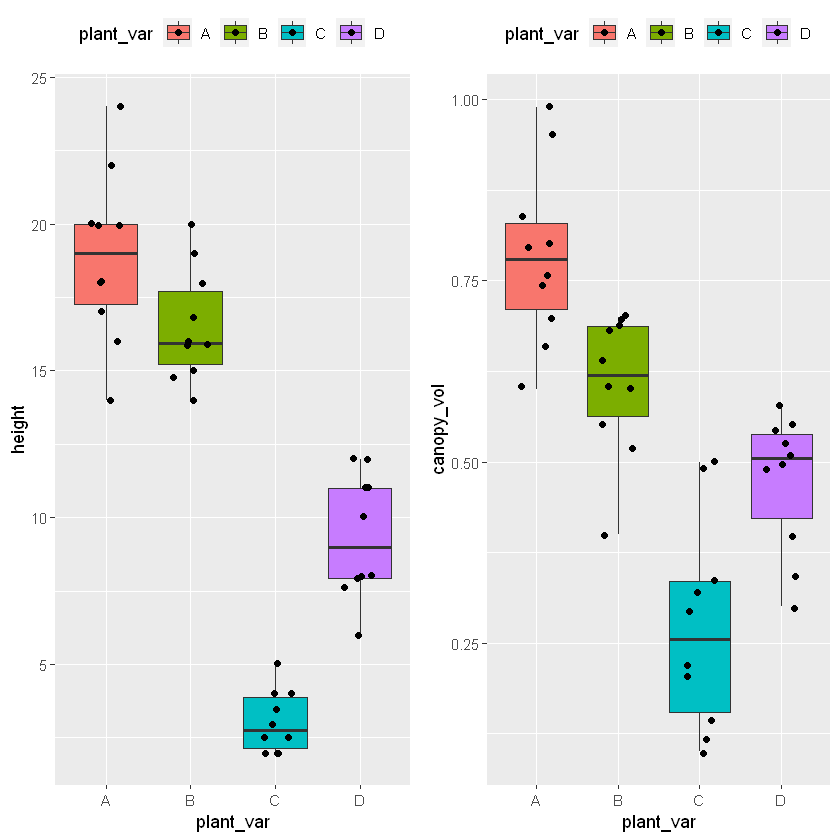

In [3]:
library(gridExtra)
p1 <- ggplot(df, aes(x = plant_var, y = height, fill = plant_var)) + geom_boxplot(outlier.shape = NA) + geom_jitter(width = 0.2) + theme(legend.position="top")
p2 <- ggplot(df, aes(x = plant_var, y = canopy_vol, fill = plant_var)) + geom_boxplot(outlier.shape = NA) + geom_jitter(width = 0.2) + theme(legend.position="top")
grid.arrange(p1, p2, ncol=2)

What we observe?

perform one-way MANOVA

Question: there is a significant effect of the plant variation on the height and on the canopy volume?

- The manova function fits a MANOVA model to the data, with dep_vars as the dependent variables and plant_var as the independent variable. The formula dep_vars ~ plant_var specifies the relationship between the variables, where ~ means "as a function of". 

- The summary function is then used to summarize the results of the MANOVA, which provides information on the overall significance of the independent variable (plan_var) in explaining the variation in the dependent variables (dep_vars). 

The summary will include information such as the test statistic, degrees of freedom, and the p-value, which can be used to determine if there is a significant difference in the mean values of the dependent variables between the levels of the independent variable.


In [4]:
dep_vars <- cbind(df$height, df$canopy_vol)  #considering both distribution
fit <- manova(dep_vars ~ plant_var, data = df)
summary(fit)
# output
         
# get effect size
library(effectsize)
effectsize::eta_squared(fit)
# output


          Df Pillai approx F num Df den Df    Pr(>F)    
plant_var  3 1.0365   12.909      6     72 7.575e-10 ***
Residuals 36                                            
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Parameter,Eta2_partial,CI,CI_low,CI_high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
plant_var,0.5182515,0.95,0.3618079,1


The Pillai’s Trace test statistics is statistically significant [Pillai’s Trace = 1.03, F(6, 72) = 12.90, p < 0.001] and indicates that plant varieties has a statistically significant association with both combined plant height and canopy volume.

The measure of effect size (Partial Eta Squared; ηp2) is 0.52 and suggests that there is a large effect of plant varieties on both plant height and canopy volume.

post-hoc test
The MANOVA results suggest that there are statistically significant (p < 0.001) differences between plant varieties, but it does not tell which groups are different from each other. To know which groups are significantly different, the post-hoc test needs to carry out.

To test the between-group differences, the univariate ANOVA can be done on each dependent variable, but this will be not appropriate and lose information that can be obtained from multiple variables together.

Here we will perform the linear discriminant analysis (LDA) to see the differences between each group. LDA will discriminate the groups using information from both the dependent variables.

Test MANOVA assumptions:

- Assumptions of multivariate normality
You can initially check the univariate normality for each combination of the independent and dependent variables. If this test does not pass (significant p value), it may be possible that multivariate normality is violated.

In [5]:
library(rstatix)
df %>% group_by(plant_var) %>%  shapiro_test(height, canopy_vol)


Caricamento pacchetto: 'rstatix'


I seguenti oggetti sono mascherati da 'package:effectsize':

    cohens_d, eta_squared


Il seguente oggetto è mascherato da 'package:stats':

    filter




plant_var,variable,statistic,p
<chr>,<chr>,<dbl>,<dbl>
A,canopy_vol,0.9684161,0.8757833
A,height,0.9796939,0.9635088
B,canopy_vol,0.8819413,0.1373554
B,height,0.9388102,0.5398513
C,canopy_vol,0.9170138,0.3327207
C,height,0.8952331,0.1940650
D,canopy_vol,0.8733088,0.1092283
D,height,0.9020769,0.2308704


As the p value is non-significant (p > 0.05) for each combination of independent and dependent variable, we fail to reject the null hypothesis and conclude that data follows univariate normality.

If the sample size is large (say n > 50), the visual approaches such as QQ-plot and histogram will be better for assessing the normality assumption. Read more here

Now, let’s check for multivariate normality Skewness and Kurtosis test, 
Using linear model fit <- lm(response_variable ~ predictor_variable_1 + predictor_variable_2 + ..., data = data_frame)  Alt +126

In [ ]:
library(mvnormtest)
dep_vars <- cbind(df$height, df$canopy_vol)
fit <- lm(dep_vars~plant_var,data = df)
mvnormtest(fit)

In [ ]:
library(mvnormalTest)
mardia(df[, c("height", "canopy_vol")])$mv.test

As the p value is non-significant (p > 0.05) for Mardia’s Skewness and Kurtosis test, we fail to reject the null hypothesis and conclude that data follows multivariate normality.

Here both Skewness and Kurtosis p value should be > 0.05 for concluding the multivariate normality.



As the p value is non-significant (p > 0.001) for Box’s M test, we fail to reject the null hypothesis and conclude that variance-covariance matrices are equal for each combination of dependent variable formed by each group in independent variable.

If this assumption fails, it would be good to check the homogeneity of variance assumption using Bartlett’s or Levene’s test to identify which variable fails in equal variance.

Multivariate outliers:
MANOVA is highly sensitive to outliers and may produce type I or II errors. Multivariate outliers can be detected using the Mahalanobis Distance test. The larger the Mahalanobis Distance, the more likely it is an outlier.

In [ ]:
library(rstatix)
# get distance
# get distance
mahalanobis_distance(data = df[, c("height", "canopy_vol")])$is.outlier


From the results, there is no multivariate outliers (all is.outlier = FALSE or p > 0.001) in the dataset. If is.outlier = TRUE, it means there is multivariate outlier in the dataset.

Linearity assumption:
Linearity assumption can be checked by visualizing the pairwise scatterplot for the dependent variable for each group. The data points should lie on the straight line to meet the linearity assumption. The violation of the linearity assumption reduces the statistical power.

In [ ]:
library(gridExtra)
p1 <- df  %>% group_by(plant_var) %>% filter(plant_var == "A") %>% ggplot(aes(x = height, y = canopy_vol)) + geom_point() + ggtitle("Variety: A")
p2 <- df  %>% group_by(plant_var) %>% filter(plant_var == "B") %>% ggplot(aes(x = height, y = canopy_vol)) + geom_point() + ggtitle("Variety: B") 
p3 <- df  %>% group_by(plant_var) %>% filter(plant_var == "C") %>% ggplot(aes(x = height, y = canopy_vol)) + geom_point() + ggtitle("Variety: C") 
p4 <- df  %>% group_by(plant_var) %>% filter(plant_var == "D") %>% ggplot(aes(x = height, y = canopy_vol)) + geom_point() + ggtitle("Variety: D") 
grid.arrange(p1, p2, p3, p4, ncol=2)

The scatterplot indicates that dependent variables have a linear relationship for each group in the independent variable

source: https://www.reneshbedre.com/blog/manova.html#test-manova-assumptions